<a href="https://colab.research.google.com/github/ADRIANVM117/ENSAYOS/blob/master/actuaria/regresion_lineal/extra/regresion_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión multiple

## Librerias 

In [1]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [28]:
import numpy as np 
import pandas as pd 
import scipy.stats 
from sklearn.linear_model import LinearRegression

# Para este ejercicio, tomamos la muestra 1 del examen final de regresion lineal 
url = 'https://raw.githubusercontent.com/ADRIANVM117/proyectos_propios/main/actuaria/regresion_lineal/final/Muestra_final.csv'
df = pd.read_csv(url)
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,Y
0,26.64,15.96,18.82,2.20,17.76,26.63,14.47,72.34
1,7.05,15.40,4.44,22.84,17.54,23.59,29.99,63.09


In [29]:
datos=df.to_numpy()
[n,m]=np.shape(datos)   

#Generando matris disenio y matriz y
y=np.zeros(n)
for i in range(0,n):
    y[i]=datos[i,m-1]
matriz_x=np.zeros([n,m])
for i in range(0,n):
  matriz_x[i,0]=1
for i in range(1,n+1):
  for j in range(1,m):
    matriz_x[i-1,j]=datos[i-1,j-1]

## Aproximación de parametros 

In [57]:
# calculo de betas 
xt=np.transpose(matriz_x)
xtx=np.dot(xt,matriz_x)
xtxinv=np.linalg.inv(xtx)
xty=np.dot(xt,y)
betas=np.dot(xtxinv,xty)
#----------------------------------------------------
# y_ajustadas
y_ajustadas=np.dot(matriz_x,betas)
#Residuales : res
res=y-y_ajustadas
# Suma residual de los cuadrados: SSres
ssres=sum(res**2)
#Media cuadratica residual : MSres
msres=ssres/(n-m)
# Suma de cuadrados de la regresión: SS_reg
ss_reg=sum((y_ajustadas-np.mean(y))**2)
# Media cuadratica de la regresión : MS_reg
ms_reg=ss_reg/(m-1)
# Suma residual total : SS_total
ss_total=ssres+ss_reg
#contando regresores 
a = matriz_x.shape
b = a[1] -1 
#------------------------------------------------------------------------------------
# Significancia del modelo 
# Prueba F-test
F = ms_reg / msres
#  Obteniendo el F critico 
F_critico = scipy.stats.f.ppf(q=1-.05, dfn=m -1, dfd=n - m)
F_critico

# Hipotesis H0 planteada. 
if F> F_critico:
  print('La hipotesis H0 se rechaza')
 
else:
  print('La hipotesis Ho se acepta')

# Calculo de la significancia del modelo
p_val=  1-scipy.stats.f.cdf(F,m-1,n-m)
significancia_modelo=(1-p_val)*100
print('Significancia del modelo: ', significancia_modelo)
#-----------------------------------------------------------------------------------------
# Significancia de los regresores
matriz_c_jj = np.zeros(m)




La hipotesis H0 se rechaza
Significancia del modelo:  99.99999928678692


In [58]:
# Significancia de los regresores
# inicio una matriz de ceros del tamaño 'm' regresores
matriz_c_jj = np.zeros(m)

# Declaro un ciclo que llene mi matriz_c_jj unicamente con la diagonal de mi matriz (XT*X)-1
for i in range(1,m):        
  matriz_c_jj[i] = xtxinv[i,i]

# Inicio una matriz de ceros para prueba t de cada regresor B_j
matriz_t = np.zeros(m)
for i in range(1,m):
# matriz con las pruebas t de cada regresor B_j
  matriz_t[i] = abs(betas[i]/ np.sqrt(matriz_c_jj[i]* msres))
# Valor p de cada prueba t 
# Iniciamos matriz de ceros para valores p de cada prueba t
matriz_p = np.zeros(m)
# valores p multiplicados * 100
matriz_p_100 = np.zeros(m)
for i in range(1,m):
  matriz_p[i] = 1 - (scipy.stats.t.sf(matriz_t[i], n - m))*2
  matriz_p_100[i] = (1 -matriz_p[i])*100
# significancia de cada regresor

matriz_significancia  = np.zeros(m)
for i in range(1,m):
  matriz_significancia[i] = 100 - matriz_p_100[i] 

#quitamos el primer valor de la matriz de significancia pues este es el de la columna de 1
matriz_significancia_completa = np.delete(matriz_significancia, 0)
# imprimo a que coeficiente pertenece cada significancia
#creamos un diccionario vacio
coeficientes_ordenados = [] 
for i in  enumerate(matriz_significancia_completa):
  coeficientes_ordenados.append(i)
print(coeficientes_ordenados)
  

[(0, 68.47336877371534), (1, 99.99999995035523), (2, 92.62626331733313), (3, 99.99977333912524), (4, 82.34162093932893), (5, 98.48590634594633), (6, 83.22674438290706)]


## Metodo Forward

In [46]:
# Declaramos mi matriz de variables dependientes y variables independientes
X = matriz_x
y_1 = y

regresion = LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Forward_selec = SFS(regresion, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           #scoring='neg_mean_squared_error',
           cv=0)
Fwd= Forward_selec.fit(X, y_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-12-03 05:37:12] Features: 1/3 -- score: 0.38659765518067846[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-12-03 05:37:12] Features: 2/3 -- score: 0.6085712639867842[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-12-03 05:37:12] Features: 3/3 -- score: 0.6760066365074447

In [47]:
print(Fwd.k_feature_names_)
print(Fwd.k_feature_idx_)
print(Fwd.k_score_)

('2', '4', '6')
(2, 4, 6)
0.6760066365074447


## Metodo Backward
- Uso de paqueteria mlxtend
- algoritmo utilizado: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#sequential-forward-selection-sfs
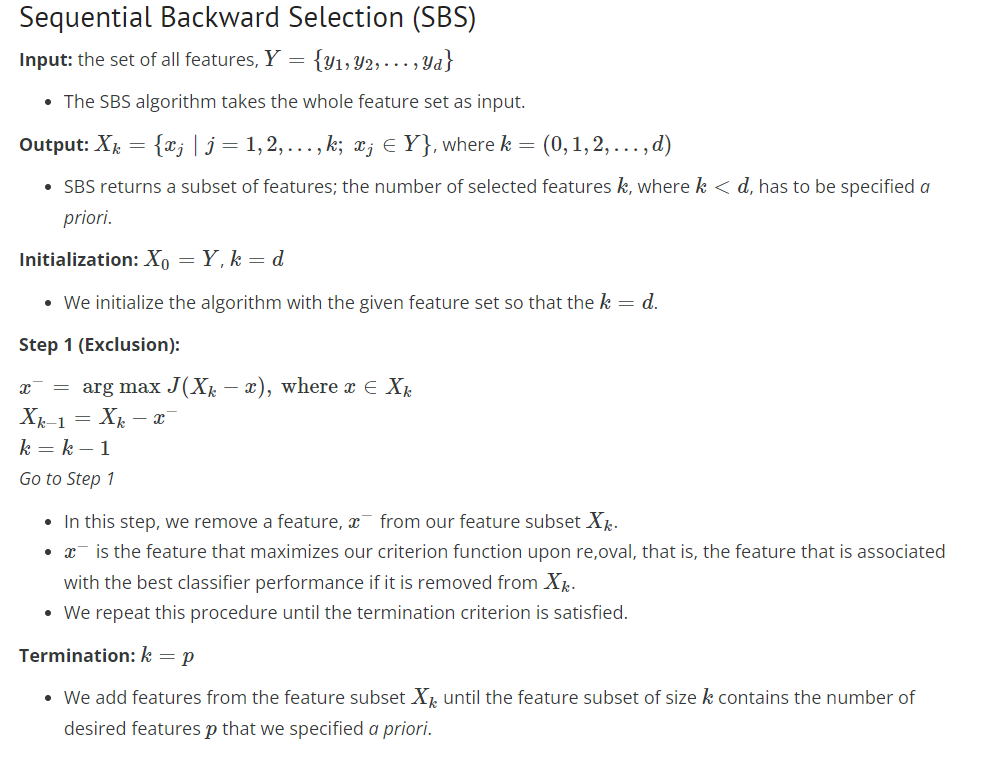

## Backward hecho por mi

In [59]:
## Ciclo while que termine hasta que la significancia de un modelo sea mayor que la otra

while ( significancia_modelo > significancia_modelo_1 ):
  significancia_modelo_1 = significancia_modelo  
  regresor_menor= min(coeficientes_ordenados)#Borrando Regresor menos significante
  regresor_menor=np.where(coeficientes_ordenados==regresor_menor)
  # calculo de betas 
  xt=np.transpose(matriz_x)
  xtx=np.dot(xt,matriz_x)
  xtxinv=np.linalg.inv(xtx)
  xty=np.dot(xt,y)
  betas=np.dot(xtxinv,xty)
#----------------------------------------------------
# y_ajustadas
  y_ajustadas=np.dot(matriz_x,betas)
#Residuales : res
  res=y-y_ajustadas
# Suma residual de los cuadrados: SSres
  ssres=sum(res**2)
#Media cuadratica residual : MSres
  msres=ssres/(n-m)
# Suma de cuadrados de la regresión: SS_reg
  ss_reg=sum((y_ajustadas-np.mean(y))**2)
# Media cuadratica de la regresión : MS_reg
  ms_reg=ss_reg/(m-1)
# Suma residual total : SS_total
  ss_total=ssres+ss_reg
#contando regresores 
  a = matriz_x.shape
  b = a[1] -1 
#------------------------------------------------------------------------------------
# Significancia del modelo 
# Prueba F-test
  F = ms_reg / msres
# Calculo de la significancia del modelo
  p_val=  1-scipy.stats.f.cdf(F,m-1,n-m)
  significancia_modelo=(1-p_val)*100
  print('Significancia del modelo: ', significancia_modelo)
#-----------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------
# Significancia de los regresores
# inicio una matriz de ceros del tamaño 'm' regresores
  matriz_c_jj = np.zeros(m)

# Declaro un ciclo que llene mi matriz_c_jj unicamente con la diagonal de mi matriz (XT*X)-1
  for i in range(1,m):        
    matriz_c_jj[i] = xtxinv[i,i]

# Inicio una matriz de ceros para prueba t de cada regresor B_j
  matriz_t = np.zeros(m)
  for i in range(1,m):
    matriz_t[i] = abs(betas[i]/ np.sqrt(matriz_c_jj[i]* msres))
    matriz_p = np.zeros(m)
    matriz_p_100 = np.zeros(m)
    for i in range(1,m):
      matriz_p[i] = 1 - (scipy.stats.t.sf(matriz_t[i], n - m))*2
      matriz_p_100[i] = (1 -matriz_p[i])*100
    matriz_significancia  = np.zeros(m)
    for i in range(1,m):
      matriz_significancia[i] = 100 - matriz_p_100[i] 
    matriz_significancia_completa = np.delete(matriz_significancia, 0)
    coeficientes_ordenados = [] 
    for i in  enumerate(matriz_significancia_completa):
      coeficientes_ordenados.append(i)
    
print(min(coeficientes_ordenados))
print('Significancia del modelo: ', significancia_modelo)
  

NameError: ignored

In [48]:
# Declaramos mi matriz de variables dependientes y variables independientes
X = matriz_x
y_1 = y

regresion = LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Backward_selec = SFS(regresion, 
           k_features=3, 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring='neg_mean_squared_error',
           cv=0)
Bwd= Backward_selec.fit(X, y_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-12-03 05:37:43] Features: 7/3 -- score: 0.7317518306313258[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-12-03 05:37:43] Features: 6/3 -- score: 0.724237829691114[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-12-03 05:37:43] Features: 5/3 -- score: 0.7116921318007057[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [49]:
print(Bwd.k_feature_names_)
print(Bwd.k_feature_idx_)
print(Bwd.k_score_)

('2', '4', '6')
(2, 4, 6)
0.6760066365074447
